In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transfroms

from tqdm import tqdm

cuda is available


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:10<00:00,  9.10s/it]


Train Accuracy 100.00%


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 32.48it/s]


Test Accuracy:  97.85000000000001 %


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:28<00:00,  9.28s/it]


Train Accuracy 99.29%


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.15it/s]


Test Accuracy:  96.96000000000001 %


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:09<00:00,  9.10s/it]


Train Accuracy 100.00%


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 30.46it/s]


Test Accuracy:  98.02 %


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:40<00:00,  9.41s/it]


Train Accuracy 100.00%


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 32.18it/s]


Test Accuracy:  97.6 %


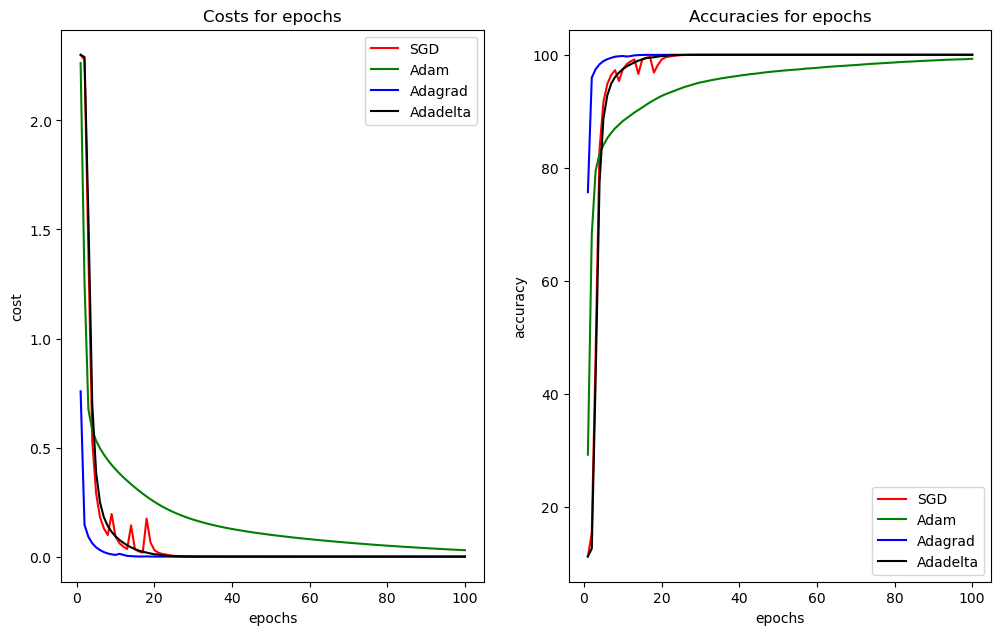

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)
print(device + " is available")

SGD_lr = 0.1
Adam_lr = 1e-5
# Adagrad_lr = 0.1
Adagrad_lr = 0.01
Adadelta_lr = 0.1
wd = 1e-5
drop_prob = 0.3
batch_size = 256
num_classes = 10
nb_epochs = 100

class model_1(nn.Module):
    def __init__(self):
        super(model_1, self).__init__()
        self.hidden1 = nn.Linear(784, 512)
        self.hidden2 = nn.Linear(512, 512)
        self.hidden3 = nn.Linear(512, 512)
        self.hidden4 = nn.Linear(512, 512)
        self.hidden5 = nn.Linear(512, 512)
        self.hidden6 = nn.Linear(512, 512)
        self.out = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.hidden5(x)
        x = self.relu(x)
        x = self.hidden6(x)
        x = self.relu(x)
        x = self.out(x)

        return x

def plot_one(nb_epochs, costs, accuracies):
    costs = np.array(costs)
    accuracies = np.array(accuracies)
    
    fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    fig.subplots_adjust(top=0.8)
    
    ax1 = fig.add_subplot(121)
    ax1.set_ylabel('cost')
    ax1.set_xlabel('epochs')
    ax1.set_title('Costs for epochs')
    ax1.plot(np.arange(1, nb_epochs + 1, 1), costs)

    ax2 = fig.add_subplot(122)
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epochs')
    ax2.set_title('Accuracies for epochs')
    ax2.plot(np.arange(1, nb_epochs + 1, 1), accuracies)    

    plt.show()


def plot_all(nb_epochs, model1_cost_list, model1_accuracy_list, model2_cost_list, model2_accuracy_list, model3_cost_list, model3_accuracy_list, model4_cost_list, model4_accuracy_list):
    model1_cost_list = np.array(model1_cost_list)
    model2_cost_list = np.array(model2_cost_list)
    model3_cost_list = np.array(model3_cost_list)
    model4_cost_list = np.array(model4_cost_list)
    model1_accuracy_list = np.array(model1_accuracy_list)
    model2_accuracy_list = np.array(model2_accuracy_list)
    model3_accuracy_list = np.array(model3_accuracy_list)
    model4_accuracy_list = np.array(model4_accuracy_list)
    
    fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    fig.subplots_adjust(top=0.8)
    
    ax1 = fig.add_subplot(121)
    ax1.set_ylabel('cost')
    ax1.set_xlabel('epochs')
    ax1.set_title('Costs for epochs')
    ax1.plot(np.arange(1, nb_epochs + 1, 1), model1_cost_list, 'r', label='SGD')
    ax1.plot(np.arange(1, nb_epochs + 1, 1), model2_cost_list, 'g', label='Adam')
    ax1.plot(np.arange(1, nb_epochs + 1, 1), model3_cost_list, 'b', label='Adagrad')
    ax1.plot(np.arange(1, nb_epochs + 1, 1), model4_cost_list, 'k', label='Adadelta')
    ax1.legend()

    ax2 = fig.add_subplot(122)
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epochs')
    ax2.set_title('Accuracies for epochs')
    ax2.plot(np.arange(1, nb_epochs + 1, 1), model1_accuracy_list, 'r', label='SGD')
    ax2.plot(np.arange(1, nb_epochs + 1, 1), model2_accuracy_list, 'g', label='Adam')
    ax2.plot(np.arange(1, nb_epochs + 1, 1), model3_accuracy_list, 'b', label='Adagrad')
    ax2.plot(np.arange(1, nb_epochs + 1, 1), model4_accuracy_list, 'k', label='Adadelta')
    ax2.legend()

    plt.show()


def load_mnist():
    train_set = torchvision.datasets.MNIST(
        root = '/MNIST',
        train = True,
        download = True,
        transform = transfroms.Compose([
            transfroms.ToTensor()
        ])
    )
    test_set = torchvision.datasets.MNIST(
        root = '/MNIST',
        train = False,
        download = True,
        transform = transfroms.Compose([
            transfroms.ToTensor()
        ])
    )
    
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, drop_last=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

    return train_loader, test_loader


def main():
    train_loader, test_loader = load_mnist()

    ##### MODEL 1 (SGD) #####
    model1 = model_1().to(device)

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.SGD(model1.parameters(), lr=SGD_lr)

    model1_cost_list = []
    model1_accuracy_list = []
    for epoch in tqdm(range(nb_epochs)):
        epoch_cost = 0
        correct = 0
        total = 0
        for data, label in train_loader:
            optimizer.zero_grad()   # Set gradient to "0"

            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            # data = data.view(data.shape[0], -1)
            hypothesis = model1(data)

            hypo_label = torch.max(hypothesis.data, 1)[1]
            correct += (hypo_label == label).sum().item()
            total += len(label)

            cost = criterion(hypothesis, label)
            cost.backward()
            optimizer.step()
            epoch_cost += cost.item()

        epoch_cost /= len(train_loader)
        accuracy = correct / total * 100

        model1_cost_list.append(epoch_cost)
        model1_accuracy_list.append(accuracy)

#         print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, epoch_cost, accuracy))
        
#         if epoch % 10 == 0:
#             print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, epoch_cost, accuracy))
    
        if epoch == nb_epochs - 1:
            print('Train Accuracy {:2.2f}%'.format(accuracy))

    with torch.no_grad():
        model1.eval()
        
        correct = 0
        total = 0

        for data, label in tqdm(test_loader):
            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            preds = model1(data)

            preds_label = torch.max(preds.data, 1)[1]
            correct += (preds_label == label).sum().item()
            total += len(label)

        accuracy = correct / total * 100
        print('Test Accuracy: ', accuracy, '%')


    ##### MODEL 2 (Adam) #####
    model2 = model_1().to(device)
#     print(model2)
    
#     count = 0
#     for name, param in model2.named_parameters():
#         print(param.size())
#         print(name)
    
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adam(model2.parameters(), lr=Adam_lr)

    model2_cost_list = []
    model2_accuracy_list = []
    for epoch in tqdm(range(nb_epochs)):
        epoch_cost = 0
        correct = 0
        total = 0
        for data, label in train_loader:
            optimizer.zero_grad()   # Set gradient to "0"

            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            # data = data.view(data.shape[0], -1)
            hypothesis = model2(data)

            hypo_label = torch.max(hypothesis.data, 1)[1]
            correct += (hypo_label == label).sum().item()
            total += len(label)

            cost = criterion(hypothesis, label)
            cost.backward()
            optimizer.step()
            epoch_cost += cost.item()

        epoch_cost /= len(train_loader)
        accuracy = correct / total * 100

        model2_cost_list.append(epoch_cost)
        model2_accuracy_list.append(accuracy)

        # if epoch % 10 == 0:
        #     print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, epoch_cost, accuracy))
        
        if epoch == nb_epochs - 1:
            print('Train Accuracy {:2.2f}%'.format(accuracy))

    with torch.no_grad():
        model2.eval()
        
        correct = 0
        total = 0

        for data, label in tqdm(test_loader):
            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            preds = model2(data)

            preds_label = torch.max(preds.data, 1)[1]
            correct += (preds_label == label).sum().item()
            total += len(label)

        accuracy = correct / total * 100
        print('Test Accuracy: ', accuracy, '%')


    ##### MODEL 3 (Adagrad) #####
    model3 = model_1().to(device)

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adagrad(model3.parameters(), lr=Adagrad_lr)

    model3_cost_list = []
    model3_accuracy_list = []
    for epoch in tqdm(range(nb_epochs)):
        epoch_cost = 0
        correct = 0
        total = 0
        for data, label in train_loader:
            optimizer.zero_grad()   # Set gradient to "0"

            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            # data = data.view(data.shape[0], -1)
            hypothesis = model3(data)

            hypo_label = torch.max(hypothesis.data, 1)[1]
            correct += (hypo_label == label).sum().item()
            total += len(label)

            cost = criterion(hypothesis, label)
            cost.backward()
            optimizer.step()
            epoch_cost += cost.item()

        epoch_cost /= len(train_loader)
        accuracy = correct / total * 100

        model3_cost_list.append(epoch_cost)
        model3_accuracy_list.append(accuracy)

        # if epoch % 10 == 0:
        #     print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, epoch_cost, accuracy))
#         print('Cost: ', epoch_cost)
        
        if epoch == nb_epochs - 1:
            print('Train Accuracy {:2.2f}%'.format(accuracy))

    with torch.no_grad():
        model3.eval()
        
        correct = 0
        total = 0

        for data, label in tqdm(test_loader):
            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            preds = model3(data)

            preds_label = torch.max(preds.data, 1)[1]
            correct += (preds_label == label).sum().item()
            total += len(label)

        accuracy = correct / total * 100
        print('Test Accuracy: ', accuracy, '%')

    ##### MODEL 4 (Adadelta) #####
    model4 = model_1().to(device)

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adadelta(model4.parameters(), lr=Adadelta_lr)

    model4_cost_list = []
    model4_accuracy_list = []
    for epoch in tqdm(range(nb_epochs)):
        epoch_cost = 0
        correct = 0
        total = 0
        for data, label in train_loader:
            optimizer.zero_grad()   # Set gradient to "0"

            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            # data = data.view(data.shape[0], -1)
            hypothesis = model4(data)

            hypo_label = torch.max(hypothesis.data, 1)[1]
            correct += (hypo_label == label).sum().item()
            total += len(label)

            cost = criterion(hypothesis, label)
            cost.backward()
            optimizer.step()
            epoch_cost += cost.item()

        epoch_cost /= len(train_loader)
        accuracy = correct / total * 100

        model4_cost_list.append(epoch_cost)
        model4_accuracy_list.append(accuracy)

        # if epoch % 10 == 0:
        #     print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, epoch_cost, accuracy))
        
        if epoch == nb_epochs - 1:
            print('Train Accuracy {:2.2f}%'.format(accuracy))

    with torch.no_grad():
        model4.eval()
        
        correct = 0
        total = 0

        for data, label in tqdm(test_loader):
            label = label.to(device)
            data = data.view(data.shape[0], -1).to(device)
            preds = model4(data)

            preds_label = torch.max(preds.data, 1)[1]
            correct += (preds_label == label).sum().item()
            total += len(label)

        accuracy = correct / total * 100
        print('Test Accuracy: ', accuracy, '%')

    plot_all(nb_epochs, model1_cost_list, model1_accuracy_list, model2_cost_list, model2_accuracy_list, model3_cost_list, model3_accuracy_list, model4_cost_list, model4_accuracy_list)


if __name__ == '__main__':
    main()